<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Ordinary Least Squares Optimization
</h1>

Accompanying notebook for the recipe:

  * Christian Bauckhage: "NumPy / SciPy Recipes for Data Science: Ordinary Least Squares Optimization",<br/> Technical Report, March 2015 ([Download from ReseachGate](https://www.researchgate.net/publication/273133972_NumPy_SciPy_Recipes_for_Data_Science_Ordinary_Least_Squares_Optimization))

  * Abstract of the paper: *In this note, we study least squares optimization for parameter estimation. By means of the basic example of a linear regression task, we explore different formulations of the ordinary least squares problem, show how to solve it using **NumPy** or **SciPy**, and provide suggestions for practical applications.*

In this notebook you find now in addition to the technical report as  `lsq_solution_V0(X, y)` a direct implementation of the formula $(X^TX)^{-1}X^Ty$ based on numpy matrices reading `(X.T * X).I * X.T * y`. It comes with a slight performance penality, especially for small matrices: 200% for n = 100, but only 3% for n = 1000000. `X` and `y` in this case have to be instantiated with `np.matrix(...)` not `np.array(...)`.

As an experiment we write `ŷ` ([Unicode 0177](https://www.fileformat.info/info/unicode/char/0177/index.htm)) instead of `yhat` to be closer to $\hat y$. This is not yet a recommendation. Try for yourself. There are [different strongly](https://stackoverflow.com/questions/2649544/unicode-identifiers-in-python) [diverging opions](https://softwareengineering.stackexchange.com/questions/16010/is-it-bad-to-use-unicode-characters-in-variable-names) on this topic on the net. The benefit of close resemblence to the mathematical formula competes with the difficulty of typing the character.

<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rnd

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Example data

In [3]:
def create_data(n, xmin=-2, xmax=12, a=1.1, b=2.0):
    x = rnd.random(n) * (xmax - xmin) + xmin
    y = a * x + b + rnd.randn(n) * 0.5
    return x, y

In [4]:
x, y = create_data(25)

In [5]:
for xi, yi in zip(x, y):
    print('({:.2f}, {:.2f})'.format(xi, yi), end=', ')

(7.83, 10.79), (3.86, 5.80), (9.66, 13.30), (3.65, 6.79), (10.35, 13.58), (4.50, 7.27), (6.26, 9.46), (2.06, 4.08), (-1.14, 0.59), (9.98, 13.83), (10.82, 13.97), (-0.29, 1.40), (10.10, 13.07), (11.35, 13.58), (4.62, 6.38), (3.00, 4.97), (2.52, 4.86), (-0.91, 0.77), (11.86, 15.56), (6.54, 9.61), (9.84, 13.14), (-0.52, 2.01), (2.70, 4.18), (9.31, 12.38), (-0.38, 1.14), 

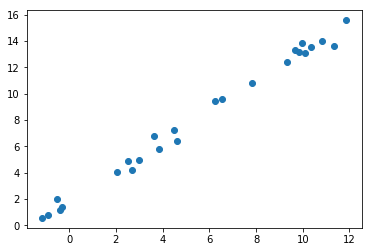

In [6]:
plt.scatter(x, y)
plt.show()

### Ordinary Least Squares

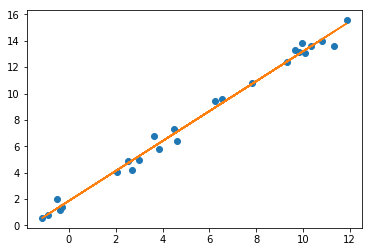

In [7]:
X = np.vander(x, 2)
w = la.lstsq(X, y)[0]
ŷ = X.dot(w)

plt.plot(x, y, 'o')
plt.plot(x, ŷ, '-')
plt.show()

## Comparison of Implementation Variants

### Computing a data matrix for linear regression

In [8]:
def data_matrix_V1(x):
    n = len(x)
    return np.vstack((x, np.ones(n))).T

def data_matrix_V2(x):
    return np.vstack((x, np.ones_like(x))).T
    
def data_matrix_V3(x):
    return np.vander(x, 2)

#### All three variants create the same matrix

In [9]:
x = [4.7, 1.1]

print(data_matrix_V1(x)); print()
print(data_matrix_V2(x)); print()
print(data_matrix_V3(x))

[[4.7 1. ]
 [1.1 1. ]]

[[4.7 1. ]
 [1.1 1. ]]

[[4.7 1. ]
 [1.1 1. ]]


### Solving Least Squares for Linear Regression


In [10]:
def lsq_solution_V0(X, y):
    w = (X.T * X).I * X.T * y
    return w

def lsq_solution_V1(X, y):
    w = la.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

def lsq_solution_V2(X, y):
    w = np.dot(la.pinv(X), y)
    return w

def lsq_solution_V3(X, y):
    w, residual, rank, svalues = la.lstsq(X, y)
    return w

#### All three variants create the same regression line

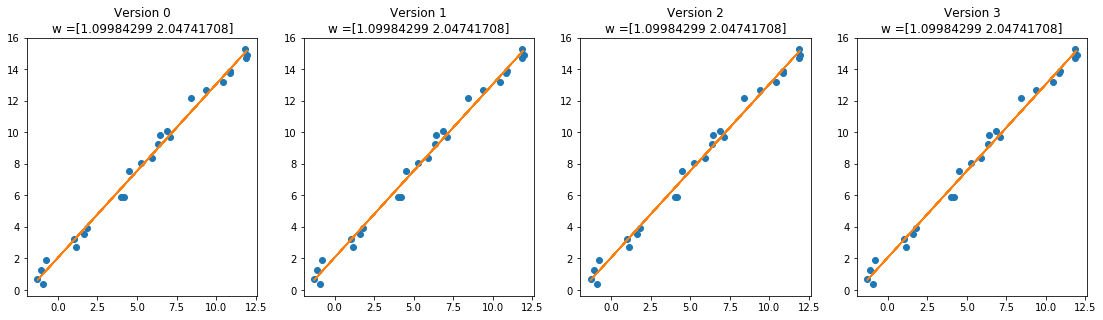

In [11]:
n = 25
x, y = create_data(n)
X    = np.vander(x, 2)

X0 = np.matrix(np.vander(x, 2)) # (n, 2)
y0 = np.matrix(y).T             # (n, 1)

w0 = lsq_solution_V0(X0, y0)
ŷ0 = X0 * w0

w1 = lsq_solution_V1(X, y)
ŷ1 = X.dot(w1)

w2 = lsq_solution_V2(X, y)
ŷ2 = X.dot(w2)

w3 = lsq_solution_V3(X, y)
ŷ3 = X.dot(w3)

fig, axs = plt.subplots(1, 4, figsize=(19, 4.75))
for a in axs: a.plot(x, y, 'o')

axs[0].set_title('Version 0\nw =' + str(np.array(w0).T[0])) # convert (2, 1) to (2,)
axs[0].plot(x, ŷ0, '-')

axs[1].set_title('Version 1\nw =' + str(w1))
axs[1].plot(x, ŷ1, '-')

axs[2].set_title('Version 2\nw =' + str(w2))
axs[2].plot(x, ŷ2, '-')

axs[3].set_title('Version 3\nw =' + str(w3))
axs[3].plot(x, ŷ3, '-')

plt.show()

### Performance comparison

In [12]:
import timeit

print(9*' ' + 'n', end='')
for v in [0, 1, 2, 3]: 
    print(8*' ' + 'V{}'.format(v), end='')
print()

for n in [100, 1_000, 10_000, 100_000, 1_000_000]:
    print('{:10}'.format(n), end='')
    for v in [0, 1, 2, 3]:

        if v == 0:
            setup = 'x, y = create_data(n); X = np.matrix(np.vander(x, 2)); y = np.matrix(y).T' 
        else: 
            setup = 'x, y = create_data(n); X = np.vander(x, 2)'
        
        t = timeit.timeit(
            stmt    = 'lsq_solution_V{}(X, y)'.format(v), 
            setup   = setup, 
            number  = 100, 
            globals = globals()
        )
        
        print('{:10.3f}'.format(t), end='')
    print()

         n        V0        V1        V2        V3
       100     0.005     0.002     0.008     0.008
      1000     0.004     0.002     0.009     0.008
     10000     0.010     0.009     0.031     0.016
    100000     0.050     0.047     0.344     0.088
   1000000     0.557     0.550     1.616     1.111


<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>